# ***Mango Leaf disease classification Using VGG-16*** 🥭

*   **Pretrained model:**
    *   **Using VGG-16 model.**

*   **Feature extraction by:**
   *   **Convolutional Layers**
   *   **Pooling Layers**

*   **Optimizers:**
      *   **L1 Lasso regulization** ( **For feature selection** )
      *   **L2 Ridge** ( **For feature selection** )
*   **Classification Algorithms:**
      *   **K-Nearest Neighbors Algorithm (KNN)**
      *   **Random forest**      
  

*   **Classification measures:**
      *   **Confusion Matrix**
      *   **Accuracy**
      *   **Precision**
      *   **Recall**
      *   **F1 Score**


**Names & IDs:**
1.  ***Moustafa Omar Mohammed - 20200542***
2.  ***Abdelrahmman Ramadan Aboulela Abu al-Ela  - 20200284***
3.  ***Abdulla Farghl Abdullah - 20200300***






# **Unzip the Data**

In [1]:
!unzip data_mango.zip

Archive:  data_mango.zip
  inflating: Anthracnose/20211008_124249 (Custom).jpg  
  inflating: Anthracnose/20211008_124250 (Custom).jpg  
  inflating: Anthracnose/20211008_124252 (Custom).jpg  
  inflating: Anthracnose/20211008_124253 (Custom).jpg  
  inflating: Anthracnose/20211008_124256 (Custom).jpg  
  inflating: Anthracnose/20211008_124301 (Custom).jpg  
  inflating: Anthracnose/20211008_124302 (Custom).jpg  
  inflating: Anthracnose/20211008_124305 (Custom).jpg  
  inflating: Anthracnose/20211008_124306 (Custom).jpg  
  inflating: Anthracnose/20211008_124310 (Custom).jpg  
  inflating: Anthracnose/20211008_124312 (Custom).jpg  
  inflating: Anthracnose/20211008_124334 (Custom).jpg  
  inflating: Anthracnose/20211008_124336 (Custom).jpg  
  inflating: Anthracnose/20211008_124341 (Custom).jpg  
  inflating: Anthracnose/20211008_124345 (Custom).jpg  
  inflating: Anthracnose/20211008_124457 (Custom).jpg  
  inflating: Anthracnose/20211008_124501 (Custom).jpg  
  inflating: Anthracnos

# **Imports**

In [2]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers



# **Loading and Resizing Images: Looping Through Folders Directory**

In [3]:
# Loading data by looping on each folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    for class_label in os.listdir(folder):
        class_path = os.path.join(folder, class_label)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, target_size)  # Resize the image
                images.append(img)
                labels.append(class_label)
    return np.array(images), np.array(labels)
data_path="data_mango"

x,y=load_and_resize_images_from_folder(data_path)

# **Splitting Dataset**

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

# **Visualizing Random Samples from Training Data**

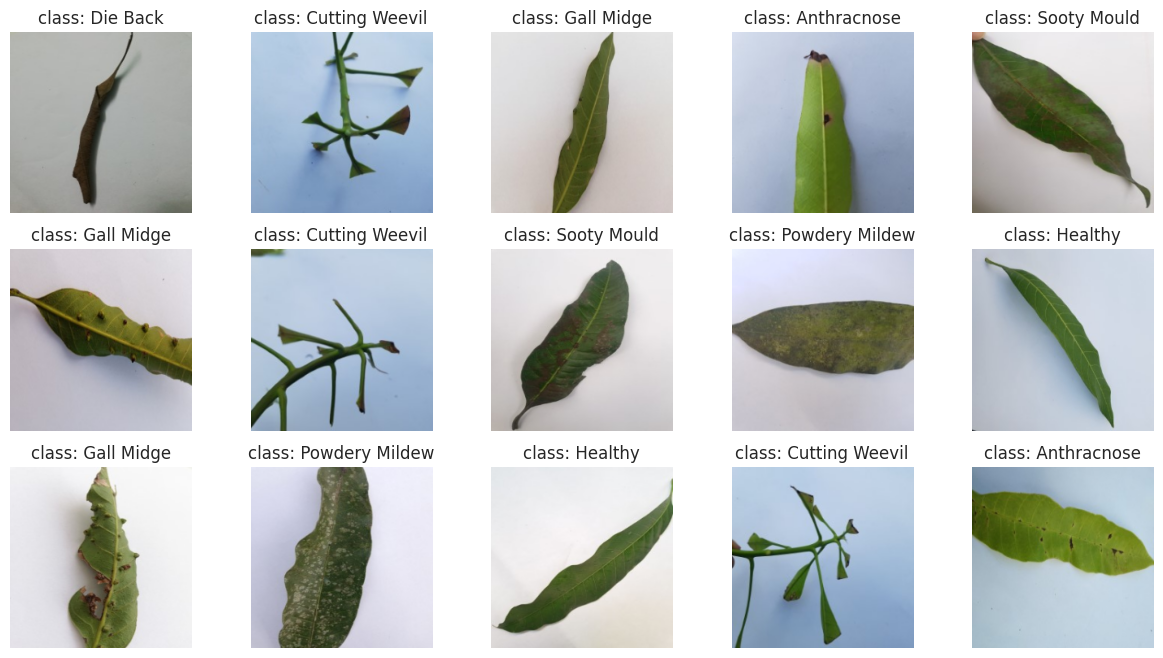

In [5]:
import random
# displaying the train data
random_indices = random.sample(range(len(x_train)), 15)


plt.figure(figsize=(15, 8))
for i, index in enumerate(random_indices, 1):
    plt.subplot(3,5, i)
    plt.imshow(x_train[index])
    plt.title(f'class: {y_train[index]}')
    plt.axis('off')

plt.show()

# **STEP1:** **Apply Pre-trained model**

# **Loading Pre-trained VGG16 Model as a Base Model**

In [6]:
base_model = tf.keras.applications.VGG16(
                                          include_top= False,
                                          weights= "imagenet",
                                          input_shape= (224,224,3),

)

In [7]:
# Freezing Weights
base_model.trainable = False

# **STEP2:** **Feature extraction & Optimizer (L1, L2) for feature selection**

# **Building sequential model**

In [8]:
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'linear')

])

# **Extracting features in separate array**

In [9]:
x_train_features = model.predict(x_train)
x_validation_features = model.predict(x_valid)
x_test_features = model.predict(x_test)

25/25 [==============================] - 3s 142ms/step


In [10]:
# Reshaping extracted features to match machine learning algorithms dims
x_train_flatten = x_train_features.reshape(x_train_features.shape[0], -1)
x_validation_flatten = x_validation_features.reshape(x_validation_features.shape[0], -1)
x_test_flatten = x_test_features.reshape(x_test_features.shape[0], -1)

In [11]:
x_train.shape

(2560, 224, 224, 3)

# **STEP3:** **Classification Algorithm**

# **One-Hot Encoding Labels**

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.fit_transform(y_test)
y_valid_numeric = label_encoder.fit_transform(y_valid)
y_train_hot = to_categorical(y_train_numeric, 8)
y_test_hot=to_categorical(y_test_numeric, 8)
y_valid_hot=to_categorical(y_valid_numeric, 8)

# **KNN Algorithm**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix


knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting
knn_classifier.fit(x_train_flatten, y_train_hot)

# predictions on test-set
y_pred = knn_classifier.predict(x_test_flatten)

# evaluate
accuracy = accuracy_score(y_test_hot, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.815


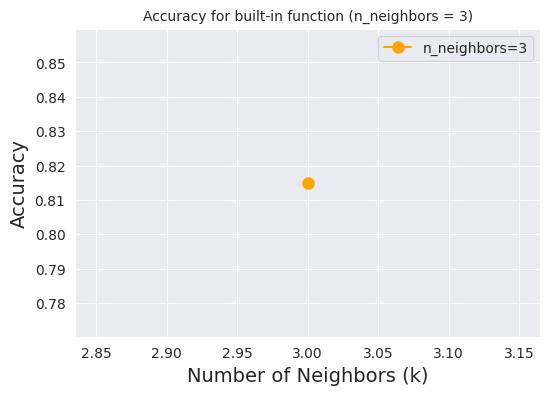



Accuracy for K=3 : 0.815


In [14]:
plt.figure(figsize=(6, 4))
plt.plot([3], [accuracy], marker='o', color='orange', label='n_neighbors=3', markersize=8)
plt.title('Accuracy for built-in function (n_neighbors = 3)', fontsize=10)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

print("\n")
print(f'Accuracy for K=3 : {accuracy}')

# **STEP4:** **Classifications Measures**

# **Confusion Matrix for K = 3**

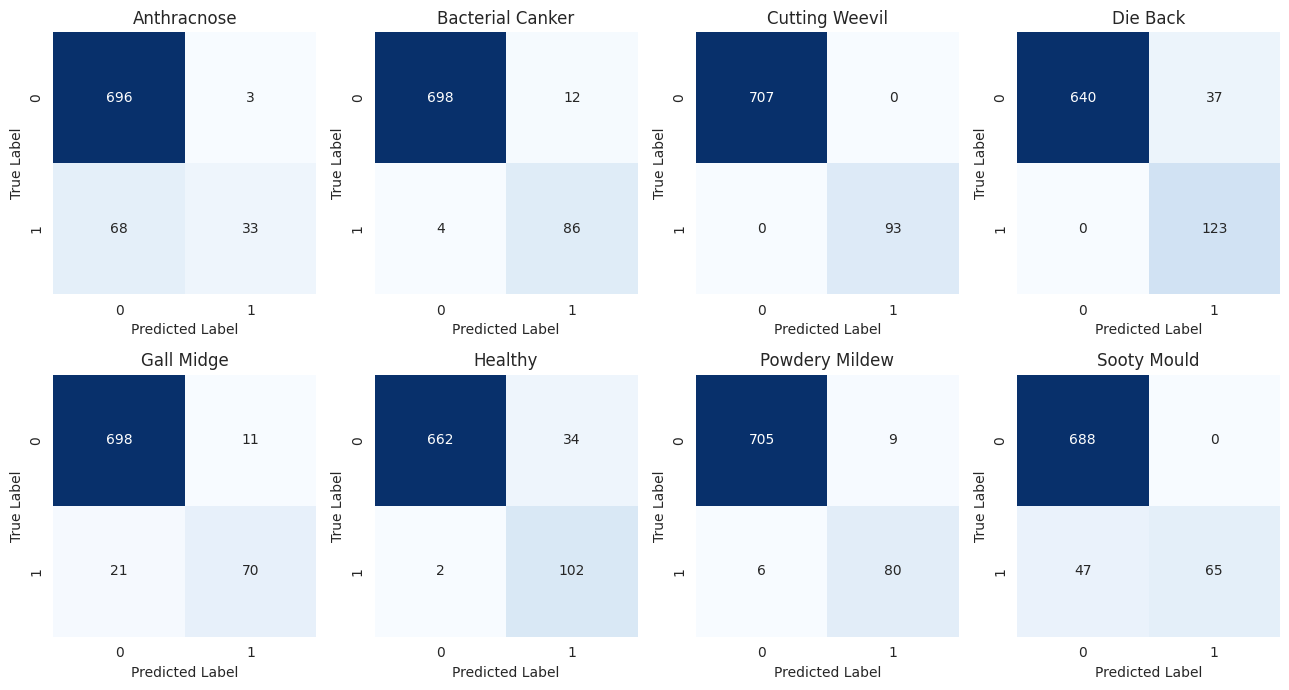

In [15]:
# Confusion matrix for each class
class_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
               "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

conf_matrices = multilabel_confusion_matrix(y_test_hot, y_pred)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(13, 7))

for i, (conf_matrix, ax) in enumerate(zip(conf_matrices, axes.flatten())):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_title(f'{class_names[i]}', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=10)
    ax.set_ylabel('True Label', fontsize=10)

plt.tight_layout()
plt.show()


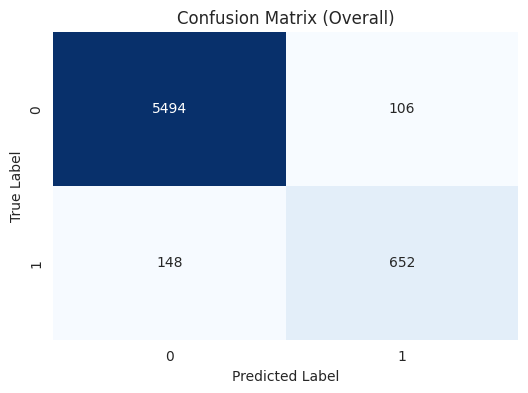

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = multilabel_confusion_matrix(y_test_hot, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix.sum(axis=0), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (Overall)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model performance scores K = 3**

In [22]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test_hot, y_pred, average='macro')

precision = precision_score(y_test_hot, y_pred, average='macro')

f1 = f1_score(y_test_hot, y_pred, average='macro')

print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

Recall: 0.8178597412274451
Precision: 0.8845052028041762
F1 score: 0.8223257339828495


# **Final Report**

In [23]:
from sklearn.metrics import classification_report

class_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
               "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

print(classification_report(y_test_hot, y_pred, target_names=class_names))


                  precision    recall  f1-score   support

     Anthracnose       0.92      0.33      0.48       101
Bacterial Canker       0.88      0.96      0.91        90
  Cutting Weevil       1.00      1.00      1.00        93
        Die Back       0.77      1.00      0.87       123
      Gall Midge       0.86      0.77      0.81        91
         Healthy       0.75      0.98      0.85       104
  Powdery Mildew       0.90      0.93      0.91        86
     Sooty Mould       1.00      0.58      0.73       112

       micro avg       0.86      0.81      0.84       800
       macro avg       0.88      0.82      0.82       800
    weighted avg       0.88      0.81      0.82       800
     samples avg       0.81      0.81      0.81       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **KNN with k = 10 and loss with epochs relation**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


neighbors_range = range(1, 10)
accuracies = []

for n_neighbors in neighbors_range:
    # fit
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(x_train_flatten, y_train_hot)

    y_pred = knn_classifier.predict(x_test_flatten)

    # Evaluate
    accuracy = accuracy_score(y_test_hot, y_pred)
    accuracies.append(accuracy)

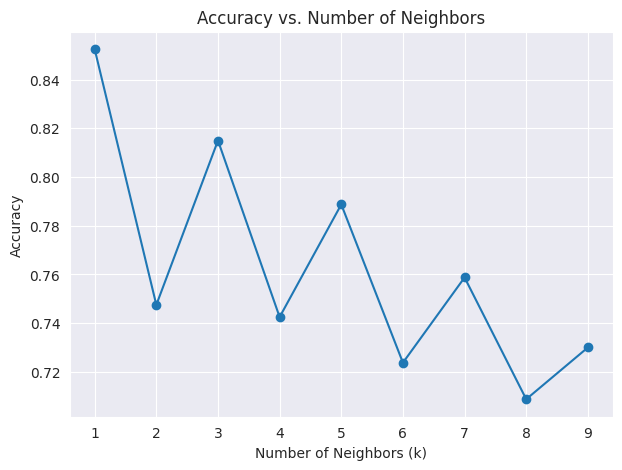



Accuracies: [0.8525, 0.7475, 0.815, 0.7425, 0.78875, 0.72375, 0.75875, 0.70875, 0.73]
Accuracy for K=10 : 0.73


In [31]:
plt.figure(figsize=(7, 5))
plt.plot(neighbors_range, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()

print("\n")
print("Accuracies:", accuracies)
print(f'Accuracy for K=10 : {accuracy}')


# **Confusion Matrix for K = 10**

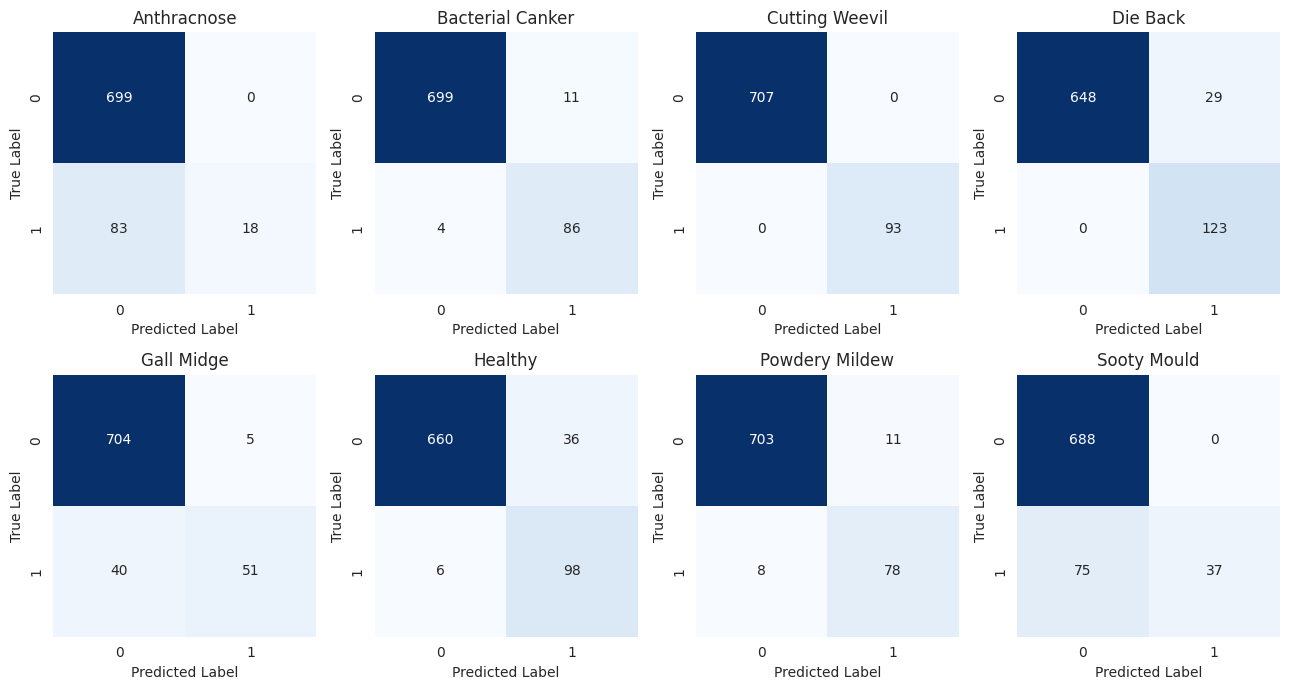

In [26]:
# Confusion matrix for each class

class_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
               "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

conf_matrices = multilabel_confusion_matrix(y_test_hot, y_pred)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(13, 7))

for i, (conf_matrix, ax) in enumerate(zip(conf_matrices, axes.flatten())):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_title(f'{class_names[i]}', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=10)
    ax.set_ylabel('True Label', fontsize=10)

plt.tight_layout()
plt.show()


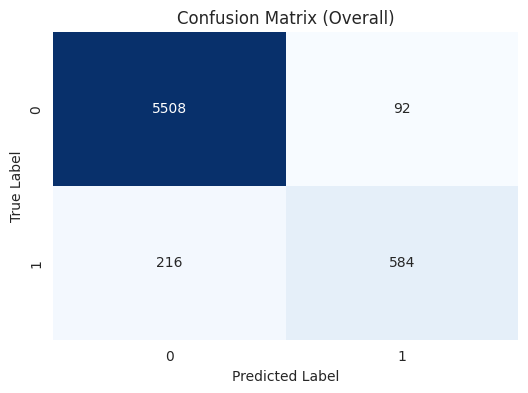

In [32]:
# Confusion matrix for all class

conf_matrix = multilabel_confusion_matrix(y_test_hot, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix.sum(axis=0), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (Overall)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model performance scores K = 10**

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test_hot, y_pred, average='macro')

precision = precision_score(y_test_hot, y_pred, average='macro')

f1 = f1_score(y_test_hot, y_pred, average='macro')

print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1)

Recall: 0.734231814641022
Precision: 0.9017838160173146
F1 score: 0.75279154859015


# **Final Classification Report**

In [30]:
from sklearn.metrics import classification_report

class_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
               "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

print(classification_report(y_test_hot, y_pred, target_names=class_names))


                  precision    recall  f1-score   support

     Anthracnose       1.00      0.18      0.30       101
Bacterial Canker       0.89      0.96      0.92        90
  Cutting Weevil       1.00      1.00      1.00        93
        Die Back       0.81      1.00      0.89       123
      Gall Midge       0.91      0.56      0.69        91
         Healthy       0.73      0.94      0.82       104
  Powdery Mildew       0.88      0.91      0.89        86
     Sooty Mould       1.00      0.33      0.50       112

       micro avg       0.86      0.73      0.79       800
       macro avg       0.90      0.73      0.75       800
    weighted avg       0.90      0.73      0.75       800
     samples avg       0.73      0.73      0.73       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Accuracy with another classification algorithm**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_flatten, y_train_hot)

# Step 5: Make predictions on the test set and evaluate the performance
y_pred = rf_model.predict(x_test_flatten)
accuracy = accuracy_score(y_test_hot, y_pred)
print(f'Accuracy with selected features: {accuracy}')

Accuracy with selected features: 0.57
